# Modelos Basados en Arboles 
# Predicción de Potabilidad del Agua

En esta ocasión se busca desarrollar un proceso de GridSearch con el fin de buscar los mejores hiperparámetros de distintos modelos dentro de un rango de valores definidos por nosotros mismos. Igualmente, se busca que usted aplique y comprenda los siguientes modelos:

- Árboles de decisión
- Bosques de decisión
- AdaBoost
- XGBoost
- Bagging

Se sugiere fuertemente leer la documentación entregada en los artículos de los links.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno. 

In [1]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

Lectura de CSV y borrado de filas incompletas.

## Pre procesamiento

* Limpieza de NAs: quitar NA y NULL de la base
* Tratamiento de datos desbalanceados: generar nuevas bases con balance de clases mediante oversampling, undersampling, entre otras 
* Definir x variables, y dependiente
* Separar base de datos: separar variables de bases de datos (X) en base de entrenamiento (ajustar parámetros), validación (sintonizar hiper parámetros) y prueba (evaluar metricas de evaluación)

## Outliers


  
## Análisis descriptivo




In [2]:
# cargar bases
# quitar na's de las observaciones
df = pd.read_csv('waterPotability/water_potability.csv').dropna()
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

<Axes: ylabel='Potability'>

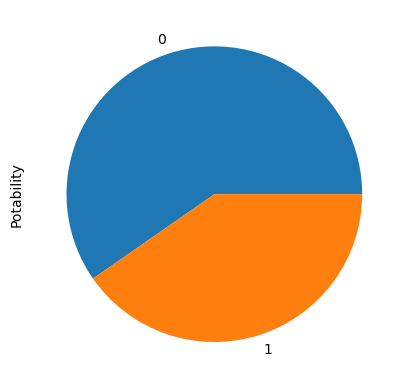

In [3]:
# generar grafica de proporcion de clases
df['Potability'].value_counts().plot(kind='pie')

### Manejo de Datos Desbalanceados: Remuestreo

Utilizaremos la función `resample` de SciKit-Learn para remuestrear algunas muestras entre la clase '1'.

In [4]:
from sklearn.utils import resample
from sklearn.utils import shuffle

# observaciones de cada clase de y target
zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1 (clase minoritaria)

# generar base con nuevas observaciones de resampleo de clase minoritaria a agregar a la base de datos
df_minority_upsampled = resample(one, replace = True, n_samples = 1200)

# concatenar observaciones(filas) de la clase 0 y la clae 1 con resampleo
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

# nueva base con muestras resampleadas de la clase minoritaria 1
df_minority_upsampled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2862,6.701941,168.745414,17176.878951,6.390966,330.674729,404.930726,10.827840,52.112707,4.179450,1
2310,6.603641,206.919743,14598.025787,6.452141,316.253503,582.110606,12.520933,68.872497,3.403798,1
289,7.628553,156.793694,26244.036908,8.337610,255.043194,495.966986,13.633974,65.604841,4.182057,1
2351,6.252810,187.569479,27690.474784,6.489931,330.949210,303.496373,14.261369,57.952826,2.921797,1
256,8.322987,207.252462,28049.646283,8.827061,297.813085,358.725869,18.709273,60.911420,4.052136,1
...,...,...,...,...,...,...,...,...,...,...
316,7.821971,157.181545,23318.187976,9.084040,324.851659,294.636531,17.186766,72.568376,3.532958,1
2395,8.304335,155.569942,18253.181095,11.448469,329.100636,380.323440,13.755926,35.057030,4.181254,1
2827,5.928767,192.048420,19240.058202,8.986863,400.164161,459.260961,9.893655,52.157787,3.592912,1
328,6.964226,212.764494,29957.191215,7.675188,321.250898,378.085546,13.127694,72.089001,3.990438,1


<Axes: ylabel='Potability'>

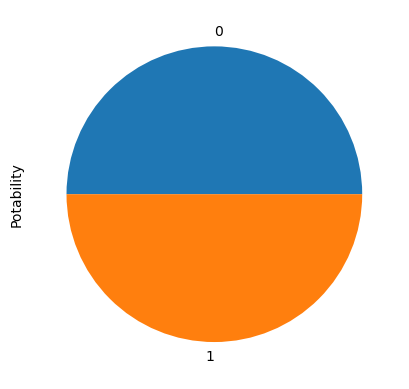

In [5]:
# pie plot para ver proporcion de clases balanceada
df['Potability'].value_counts().plot(kind='pie')

In [6]:
# generar X predictores/variables, y target
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2637,8.654793,218.172660,14799.311464,6.164049,366.147992,416.870333,8.954520,72.620280,5.148138
3043,6.260892,188.061805,33809.224701,8.141301,341.498044,522.301232,14.467501,47.050155,4.397386
1406,5.848667,210.441205,33095.389597,6.095884,312.375786,482.451933,11.813338,61.935078,4.874534
1932,7.185276,212.483172,25645.067233,8.142513,352.869165,435.282981,8.930242,75.600980,2.959154
2558,6.238054,178.298051,21919.593435,7.085377,335.858369,287.572947,17.459888,46.953271,3.848307
...,...,...,...,...,...,...,...,...,...
1083,7.714089,194.738282,27336.962624,7.631357,322.072956,347.829203,10.641789,63.722933,3.182583
653,5.970579,202.745520,19952.309470,7.872038,311.188185,412.038922,18.632142,73.166338,5.013281
120,6.877457,136.879214,27433.587294,7.091522,307.397088,342.196347,18.403846,81.193412,3.827650
1465,5.329939,196.034623,24000.523144,5.729575,335.092322,511.705187,18.588091,68.458037,5.799322


## Parte 1: Prueba de Modelos y GridSearch/RandomizedSearch

A continuación, realizaremos un procedimiento de búsqueda del mejor modelo y sus correspondientes hiperparámetros. Estos procedimientos se conocen como GridSearch/RandomizedSearch. Puede encontrar más información en los siguientes enlaces:

- [GridSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [RandomizedSearch SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [GridSearchCV](https://www.mygreatlearning.com/blog/gridsearchcv/)
- [Medium Article: GridSearch & RandomizedSearch](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score, f1_score 
from sklearn.metrics import make_scorer, confusion_matrix 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import classification_report

Partición de datos de prueba/entrenamiento.

In [9]:
# dividir base en train-set y test-set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1209,7.828740,176.727511,33337.109649,5.438776,286.992631,290.118613,5.871941,75.714425,5.199447
1369,8.121254,200.353696,25412.709742,6.547650,314.090738,411.986987,12.419359,59.763194,4.428312
2125,6.093092,208.908022,21456.604422,9.600683,263.453490,459.015554,19.296765,31.007235,4.523558
2912,5.158723,119.093840,33892.245951,7.572175,407.476849,325.202570,16.963982,73.224833,4.094605
3054,9.065894,164.674803,20260.403692,7.588175,304.567537,408.901270,10.178500,84.723107,4.299503
...,...,...,...,...,...,...,...,...,...
2457,6.727185,197.439216,26012.488746,6.952008,346.628735,473.330078,18.437835,69.466289,4.158249
979,8.163076,183.161853,20335.676510,6.028559,333.084455,475.296471,18.248098,49.604842,3.287244
654,6.273806,191.850396,15130.154368,5.112751,349.949530,538.203713,12.383597,52.097687,4.510405
2431,8.205551,204.665829,17414.520623,6.839622,276.770098,346.540729,12.505601,83.916749,5.129528


## Parte 1A

### Definición de Parámetros de GridSearch/RandomizedSearch

Basado en la documentación de las funciones, defina los siguientes parámetros para los casos:

- GridSearch:
    - Árbol de Decisión (GridSearch):
        - 'criterion': 'gini' y 'entropy'
        - 'max_depth': vector de valores enteros entre 1 y 50
        - 'min_samples_leaf': 10 valores seleccionados por usted entre 1 y 100
    
    - Random Forest (GridSearch):
        - 'n_estimators': 4 valores seleccionados por usted entre 100 y 500
        - 'min_samples_leaf': 3 valores seleccionados por usted entre 2 y 30
        
    - AdaBoost (GridSearch):
        - 'n_estimators': 6 valores seleccionados por usted entre 50 y 600
        - 'learning_rate': 5 valores de tasas de aprendizaje entre 0 y 1
        
    - XGBoost (RandomizedSearch):
        - 'n_estimators': 8 valores seleccionados por usted entre 50 y 600
        - 'learning_rate': 5 valores de tasas de aprendizaje entre 0 y 1
    

In [10]:
# crear escalador MinMaxScaler() sobre los predictores X para train-set y test-set
scaler = RobustScaler() # Utilice un MinMaxScaler #
x_train_scaled = scaler.fit_transform(x_train) # Aplique el Escalamiento (función fit_transform) # 
x_test_scaled =  scaler.transform(x_test) # Aplique el Escalamiento (función fit_transform) #

x_test_scaled

array([[-1.19750688, -1.14311707, -0.17710918, ..., -0.66415089,
         0.155123  ,  0.5451022 ],
       [-0.09987649,  0.23436118, -0.949728  , ...,  0.45390221,
         0.10982767, -0.95064246],
       [ 0.1083991 , -0.3078934 , -0.01592259, ..., -1.28441058,
         1.09605339,  0.84281362],
       ...,
       [ 0.13260934,  0.43657803,  0.38428409, ..., -0.35877547,
        -0.13375148, -1.35286019],
       [ 0.55372131,  0.15724636,  0.56505089, ...,  0.02747754,
        -0.12888281, -0.6001588 ],
       [ 0.90448847, -0.60941108, -0.18444759, ...,  0.77543331,
         0.49351199, -0.94623866]])

In [11]:
# Búsqueda de Hiperparámetros
# crear modelo de ML de ensamble
lr = LogisticRegression(n_jobs=-1, random_state=100)

dt = DecisionTreeClassifier(splitter='best', random_state=100)

#  max_depth = 7
rf = RandomForestClassifier(n_jobs=-1, max_features = 3, verbose = 1, random_state=100)

ada = AdaBoostClassifier(random_state=100)

xgb = XGBClassifier(max_depth = 7, verbosity=3, random_state=100)


#Regresión Logística
para_lr = { 'penalty': ['l1','l2','elasticnet'], 'C':np.linspace(0.01,50,num=20,dtype=float) }
grid_lr = GridSearchCV(lr, param_grid=para_lr, scoring= make_scorer(recall_score,pos_label=0), n_jobs=-1, cv=5, verbose = 3)

#Árbol de Decisión
para_dt = { 'criterion': ['gini','entropy'], 'max_depth': np.linspace(1,50,num=20,dtype=int), 'min_samples_split': np.linspace(9,20,num=5,dtype=int), 'min_samples_leaf': np.linspace(1,100,num=10,dtype=int)}
grid_dt = GridSearchCV(dt, param_grid=para_dt, scoring= make_scorer(recall_score,pos_label=0), n_jobs=-1, cv=5, verbose = 3)

#Random Forest
# hiperparametros 
params_rf = {'n_estimators':np.linspace(100,500,num=4,dtype=int),'criterion':['gini','entropy'], 'max_depth': np.linspace(1,50,num=20,dtype=int), 'min_samples_split': np.linspace(9,20,num=5,dtype=int), 'min_samples_leaf':np.linspace(2,30,num=3,dtype=int), 'max_features':[3,6,9], 'oob_score':[True,False] }
grid_rf = GridSearchCV(rf, param_grid=params_rf, scoring= make_scorer(recall_score,pos_label=0), n_jobs=-1, cv=5, verbose = 3)

#AdaBoost
params_ada = {'n_estimators':np.linspace(50,600,num=6,dtype=int), 'learning_rate':np.linspace(0.01,1,num=5,dtype=float) }
grid_ada =  GridSearchCV(ada, param_grid=params_ada, scoring= make_scorer(recall_score,pos_label=0), n_jobs=-1, cv=5, verbose = 3)

#XGBoost
params_xgb = {'n_estimators':np.linspace(50,600,num=8,dtype=int), 'learning_rate':np.linspace(0.01,1,num=5,dtype=float), 'booster':['gbtree','dart']}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, scoring= make_scorer(recall_score,pos_label=0), n_jobs=-1, cv=5, verbose = 3)

rs_xgb

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=100, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'dart'],
                                        'learning_rate': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ]),
                                        'n_estimators': array([ 50, 128, 207, 285, 364, 442, 521, 600])},
                   scoring=make_scorer(recall_score, pos_label=0), verbose=3)

### Búsqueda de Hiperparámetros

A continuación se debe realizar el proceso de GridSearch. Esta operación puede tardar.

In [12]:
# ajustar/entrenar los optimizador de hiperparametros GridSearchCV de cada modelo
grid_lr.fit(x_train_scaled, y_train)
grid_dt.fit(x_train_scaled, y_train)
grid_rf.fit(x_train_scaled, y_train)
grid_ada.fit(x_train_scaled, y_train)
rs_xgb.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.490 total time=   0.0s
[CV 5/5] END ................C=0.01, penalty=l2;, score=0.505 total time=   0.0s
[CV 1/5] END ..........C=0.01, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0.01, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END ..........C=0.01, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END ..........C=0.01, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5] END ..........C=0.01, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5] END .....C=2.641052631578947, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....C=2.641052631578947, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....C=2.641052631578947, penalty=

/home/diego-pc/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/home/diego-pc/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/diego-pc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/diego-pc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 5

[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=67, min_samples_split=11;, score=0.875 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=78, min_samples_split=9;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=78, min_samples_split=9;, score=0.984 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=78, min_samples_split=14;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=78, min_samples_split=14;, score=0.958 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=78, min_samples_split=9;, score=0.875 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=78, min_samples_split=14;, score=0.917 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=78, min_samples_split=17;, score=0.917 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=78, min_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks     

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.693 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.797 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.750 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.797 total time=   0.3s[CV 5/5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed: 

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.750 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.688 total time=   0.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.656 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.656 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.776 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.708 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.693 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.724 total time=   0.8s
[CV 2/5] 

[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.708 total time=   0.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBa

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.724 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.693 total time=   0.7s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Done  34 ta

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.734 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBack

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.734 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.776 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.745 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.750 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.714 total time=   1.3s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurren

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.776 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.750 total time=   1.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.745 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.714 total time=   1.0s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.781 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.714 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.724 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.740 total time=   1.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_j

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.714 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.693 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.797 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.750 total time=   0.3s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | e

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.693 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.724 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.781 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.688 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.797 total time=   0.3s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Paral

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.750 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.688 total time=   0.3s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.740 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.714 total time=   1.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.656 total time=   0.8s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:   

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.708 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.776 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.724 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.656 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.693 total time=   0.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_j

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.776 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.708 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.724 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.693 total time=   0.6s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.734 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.776 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.750 total time=   1.2s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBack

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.745 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.734 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.776 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.750 total time=   1.0s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.714 total time=   1.2s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.745 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.714 total time=   1.0s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.714 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elaps

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.724 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.781 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.740 total time=   1.7s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Paralle

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.693 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.781 total time=   1.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.714 total time=   1.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.792 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.797 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.724 total time=   1.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s fin

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.693 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.750 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.688 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.750 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.797 total time=   0.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jo

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.688 total time=   0.3s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s


[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.740 total time=   1.4s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      |

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.656 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.714 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.656 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.708 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.776 total time=   0.9s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.693 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.724 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s


[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.776 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.708 total time=   0.7s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingB

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.724 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.693 total time=   0.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Pa

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.776 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.734 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.750 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.745 total time=   1.2s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.714 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.734 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.776 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.750 total time=   1.0s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elap

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.714 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.745 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elaps

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.714 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.781 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Paralle

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.724 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.714 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.740 total time=   1.6s


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.693 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.797 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.724 total time=   1.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tas

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.750 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.781 total time=   1.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.693 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.688 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.797 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.750 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.688 total time=   0.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend Threadin

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.740 total time=   1.3s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurre

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.714 total time=   1.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.656 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.776 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.708 total time=   0.7s


[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Para

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.656 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.724 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.693 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.776 total time=   0.7s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.708 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.724 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.693 total time=   0.6s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.734 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.776 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.750 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.745 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.734 total time=   0.9s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBa

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.776 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.714 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.750 total time=   1.0s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_j

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.745 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.714 total time=   1.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.714 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.714 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.724 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.781 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.740 total time=   1.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.693 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.750 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.797 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.781 total time=   1.2s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | e

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.693 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.724 total time=   1.4s

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.688 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.797 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.750 total time=   0.4s

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.688 total time=   0.3s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.740 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.714 total time=   1.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 2

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.724 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.776 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.656 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.708 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.656 total time=   0.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parall

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.693 total time=   0.8s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s


[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.776 total time=   0.6s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | ela

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.693 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.708 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.724 total time=   0.7s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: 

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.776 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.734 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.750 total time=   1.1s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.745 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.714 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.734 total time=   0.9s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.776 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.750 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBa

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.714 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.745 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jo

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.781 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.714 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.714 total time=   1.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.740 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.724 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.714 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.703 total time=   0.3s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | el

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.781 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.724 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.740 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.688 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.792 total time=   0.4s


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jo

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.703 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.740 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.688 total time=   0.3s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]:

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.740 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.651 total time=   0.8s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend Threadin

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.750 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.651 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.688 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.698 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.729 total time=   0.8s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jo

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.698 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.750 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.729 total time=   0.6s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.688 total time=   0.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Usi

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.740 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.708 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.745 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.771 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.708 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.771 total time=   0.9s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.724 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.740 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: 

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.745 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.724 total time=   1.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.781 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.724 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.740 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.708 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.708 total time=   1.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.714 total time=   1.6s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks     

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.703 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.740 total time=   0.4s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.724 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.781 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.703 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.688 total time=   0.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.792 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.688 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.740 total time=   0.3s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elap

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.740 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.651 total time=   0.8s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.698 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.750 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.651 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.729 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.688 total time=   0.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  3

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.750 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.698 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.729 total time=   0.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.688 total time=   0.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.708 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.771 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.745 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.740 total time=   1.2s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.708 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.771 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.740 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.724 total time=   1.3s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 c

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.745 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.724 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elap

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.708 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.781 total time=   1.6s


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 50

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.740 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.724 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.708 total time=   1.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.703 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.714 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.724 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.781 total time=   1

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.703 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.740 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.688 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.740 total time=  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.688 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.740 total time=   1.3s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.750 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.651 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.714 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.688 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.729 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.698 total time=   0.

[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 conc

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.651 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.750 total time=   0.7s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.698 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.688 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.729 total time=   0.6s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.708 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.771 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.740 total time=   1.2s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.745 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.708 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.724 total time=   1.1s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.771 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.740 total time=   1.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]:

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.724 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.745 total time=   1.0s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jo

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.708 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.781 total time=   1.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 1

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.724 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.708 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.740 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.714 total time=   1.6s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.781 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.703 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.724 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.792 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.740 total time=   0

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapse

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.688 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.703 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.740 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.688 total time= 

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]:

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.740 total time=   1.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.714 total time=   1.5s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | e

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.651 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.750 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.698 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.688 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.729 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.651 total time=   0.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished


[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.750 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.698 total time=   0.6s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.729 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.688 total time=   0.6s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.740 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.771 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.708 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.745 total time=   1.2s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parall

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.708 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.724 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.771 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.740 total time=   1.0s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.745 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.724 total time=   1.0s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elap

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.708 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.708 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.781 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.740 total time=   1.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.714 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.724 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.703 total time=   0.3s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.781 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.724 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.792 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.740 total time=   0.3s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.688 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.703 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.792 total time=   0.3s


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.740 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.688 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      |

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.740 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapse

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.651 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.651 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.750 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.698 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.729 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.688 total time=   0.

[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent wo

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.698 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.750 total time=   0.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.729 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.688 total time=   0.7s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Paralle

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.740 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.771 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.708 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.708 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.745 total time=   1.2s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.724 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.771 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.740 total time=   1.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: 

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.745 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.724 total time=   1.1s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.708 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.781 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.724 total time=   1.6s


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s 

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.740 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.708 total time=   1.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.714 total time=   1.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks    

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.781 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.698 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.724 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.781 total time=   0.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tas

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.724 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.672 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.698 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 c

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.781 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.724 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.672 total time=   0.3s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]:

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.740 total time=   1.6s


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBacke

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.755 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.651 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.651 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.703 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.688 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.677 total time=   0.8s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: 

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.755 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.688 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.703 total time=   0.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.677 total time=   0.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: D

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.703 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.724 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.771 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.729 total time=   1.2s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Paralle

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.714 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.703 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.729 total time=   1.0s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks     

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.771 total time=   1.2s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:   

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.724 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.714 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.776 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.708 total time=   1.6s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.729 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.714 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.703 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.708 total time=   1.4s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tas

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.698 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.724 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.781 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.776 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.729 total time=   1.3

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: D

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.698 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.672 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.781 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.724 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.672 total time= 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | 

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.703 total time=   1.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.651 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.703 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.651 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.755 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.688 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.677 total time=   0.

[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.688 total time=   0.7s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.677 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.703 total time=   0.7s


[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 36

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.703 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.724 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.729 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.703 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.771 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.714 total time=   1.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.771 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.729 total time=   0.9s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_job

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.724 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.714 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using bac

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.729 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.776 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.714 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.708 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.708 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.703 total time=   1.

[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Us

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.698 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.781 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.802 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.724 total time=   0.3s


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Paral

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.776 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.698 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.729 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.672 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.781 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.672 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.724 total time=   0.4s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.703 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.651 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.755 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.688 total time=   0.7s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend 

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.703 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.651 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.688 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.755 total time=   0.6s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurr

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.677 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.677 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.703 total time=   0.7s


[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks   

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.703 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.729 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.771 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.703 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.771 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.714 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.724 total time=   1

[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.729 total time=   1.0s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.724 total time=   1.0s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.714 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurre

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.708 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.776 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.708 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.714 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.729 total time=   1.6s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 5

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.703 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.802 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.698 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.781 total time=   0.3s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.776 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.724 total time=   0.4s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend Th

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.729 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.672 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.698 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.802 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.781 total time=   0.3s


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Para

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.724 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.672 total time=   0.3s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:   

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.703 total time=   1.3s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks  

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.651 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.755 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.703 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.688 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.651 total time=   0.6s


[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.677 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.755 total time=   0.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      

[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.688 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.703 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.677 total time=   0.7s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.703 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.771 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.729 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.724 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.714 total time=   1.2s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks   

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.771 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.703 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.729 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.724 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.714 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.708 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.776 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.708 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.729 total time=   1.5s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_job

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.703 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.714 total time=   1.6s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.698 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.781 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.724 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.802 total time=   0.5s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend T

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.776 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.729 total time=   1.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.672 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.781 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.698 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.724 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.672 total time= 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 50

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.714 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.703 total time=   1.4s


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finish

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.651 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.651 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.755 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.688 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.677 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.703 total time=   0.

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elaps

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.755 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.688 total time=   0.7s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.677 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.703 total time=   0.6s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.771 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.703 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.729 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.724 total time=   1.2s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parall

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.703 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.714 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.771 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.729 total time=   1.1s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      

[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.724 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.714 total time=   0.9s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurre

[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.708 total time=   1.5s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concur

[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.776 total time=   1.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.714 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.729 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.708 total time=   1.3s


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs

[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.703 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.776 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.849 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.729 total time=   1.3s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.896 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.849 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.896 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.859 total time=   0.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s fin

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.865 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.714 total time=   1.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s


[CV 5/5] END criterion=gini, max_depth=1, max_features=3, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.703 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.812 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.891 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.854 total time=   0.8s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using back

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.833 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.870 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 task

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.854 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.812 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s


[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.891 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.833 total time=   0.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:   

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.870 total time=   0.8s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.818 total time=   1.2s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parall

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.854 total time=   1.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.875 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.818 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.891 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.828 total time=   1.3s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.854 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.891 total time=   1.1s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.828 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished


[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.875 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurre

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.854 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.818 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.818 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.891 total time=   1.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.833 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.870 total time=   1.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Par

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.896 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.854 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.849 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.849 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.896 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.802 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.891 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.859 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks    

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.865 total time=   0.4s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Pa

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.833 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.870 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.812 total time=   0.8s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.870 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.833 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.854 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.891 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend Threa

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.812 total time=   0.7s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s


[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.854 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.891 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.870 total time=   0.7s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 184 task

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.833 total time=   0.8s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend Thre

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.891 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.818 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.854 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.828 total time=   1.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished


[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.818 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.854 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.875 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.891 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  3

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.828 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.875 total time=   1.1s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.818 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.854 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.818 total time=   1.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.891 total time=   1.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.833 total time=   1.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.870 total time=   1.7s


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.849 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.896 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.891 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.854 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_job

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.849 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.859 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.865 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.802 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.896 total time=   0.3s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.833 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.870 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.812 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.812 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.870 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.854 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.891 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.833 total time=   0.9s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.854 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.891 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.833 total time=   0.7s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.870 total time=   0.7s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Para

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.854 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.818 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.891 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.828 total time=   1.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks 

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.818 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.854 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.875 total time=   1.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Do

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.891 total time=   1.3s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:   

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.828 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.875 total time=   1.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Paral

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.818 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.854 total time=   1.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.833 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.891 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.870 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.818 total time=   1.5s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]:

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.849 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.896 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.891 total time=   1.5s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.854 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.849 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.896 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.859 total time=   0.3s

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.865 total time=   0.3s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.833 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.870 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.854 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.812 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.891 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.870 total time=   0.8s


[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend T

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.812 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.833 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 23

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.891 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.854 total time=   0.7s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out o

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.870 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.833 total time=   0.8s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend Threa

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.818 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.854 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.828 total time=   1.3s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished


[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.891 total time=   1.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.818 total time=   1.1s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Paralle

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.875 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.854 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.891 total time=   1.1s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: D

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.828 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.875 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurr

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.818 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.818 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.854 total time=   1.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.891 total time=   1.6s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Paralle

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.833 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.849 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.870 total time=   1.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.854 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.891 total time=   1.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | 

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.859 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.896 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.849 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.896 total time=   0.3s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.865 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.859 total time=   0.5s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingB

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.833 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.870 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.854 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.812 total time=   0.8s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s


[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.891 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.833 total time=   0.8s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tas

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.812 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.870 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.854 total time=   0.7s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elap

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.891 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.870 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.833 total time=   0.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingB

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.818 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.854 total time=   1.4s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapse

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.891 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.828 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.818 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.875 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.854 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapse

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.891 total time=   1.1s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | ela

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.828 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.875 total time=   1.0s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.854 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.818 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.818 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.891 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.870 total time=   1.7s


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.833 total time=   1.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 c

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.802 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.844 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.906 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.854 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.891 total time=   1.5s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.859 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.802 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.844 total time=   0.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.906 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.859 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.865 total time=   0.3s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parall

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.870 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.833 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.859 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.812 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.812 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.828 total time=   0.8s
[

[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.891 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.859 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.828 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.865 total time=   0.7s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 366 ou

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.901 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.818 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.859 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.828 total time=   1.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jo

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.818 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.859 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.901 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.875 total time=   1.2s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBa

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.875 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.828 total time=   1.2s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.859 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.818 total time=   1.8s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.818 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.901 total time=   1.7s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 task

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.828 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.870 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.844 total time=   0.4s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.859 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.901 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.906 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.802 total time=   0.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.844 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.906 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.865 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.859 total time=   0.3s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 18

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.828 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.870 total time=   1.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.812 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.859 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.891 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.812 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.828 total time=   0.8s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using b

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.891 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.859 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.865 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backe

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.828 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.865 total time=   0.7s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Paralle

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.859 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.818 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.818 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.901 total time=   1.3s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.875 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.828 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.859 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.901 total time=   1.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:   

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.828 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.875 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks   

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.818 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.859 total time=   1.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.828 total time=   1.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.901 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.818 total time=   1.6s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.870 total time=   1.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.906 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.844 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.802 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.859 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.901 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.906 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.844 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.865 total time=   0.5s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.859 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.865 total time=   0.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.870 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.828 total time=   1.6s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      |

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.812 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.891 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.859 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.812 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.828 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.865 total time=   1.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_job

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.859 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.891 total time=   0.8s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 task

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.865 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.828 total time=   0.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Do

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.859 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.818 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.828 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.901 total time=   1.5s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | el

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.818 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.859 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.875 total time=   1.4s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.901 total time=   1.1s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks     

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.828 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.875 total time=   1.2s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elap

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.818 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.818 total time=   1.4s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks     

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.901 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.859 total time=   1.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.870 total time=   1.7s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent w

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.828 total time=   2.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.844 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.906 total time=   0.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.859 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.901 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parall

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.844 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.906 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.859 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_job

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.865 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.828 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.870 total time=   1.5s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend Thre

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.812 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.859 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.828 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.891 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.812 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.865 total time=   0.

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Pa

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.891 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.859 total time=   0.8s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.828 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.865 total time=   0.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: U

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.818 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.859 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.828 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.818 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.901 total time=   1.5s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.875 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.859 total time=   1.1s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished


[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.901 total time=   1.1s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parall

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.828 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.875 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elaps

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.818 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.859 total time=   1.7s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend wit

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.901 total time=   1.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.828 total time=   1.8s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.818 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.870 total time=   2.1s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend wi

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.844 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.901 total time=   1.5s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Par

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.859 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.906 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using 

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.906 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.859 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.844 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.865 total time=   0.3s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.828 total time=   1.5s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished


[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.870 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.859 total time=   0.8s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.812 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.865 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.891 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.828 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.859 total time=   0.7s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Don

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.812 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.891 total time=   0.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 ta

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.828 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.865 total time=   0.8s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.818 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.859 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.901 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.828 total time=   1.4s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.875 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.818 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.859 total time=   1.1s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.901 total time=   1.1s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parall

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.828 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.875 total time=   1.2s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks    

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.818 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.859 total time=   1.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.828 total time=   1.7s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingB

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.818 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.901 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.870 total time=   1.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.839 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.901 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 ou

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.859 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.901 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.802 total time=   0.4s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.839 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.901 total time=   0.3s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurr

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.865 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.859 total time=   0.3s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      |

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.828 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.870 total time=   1.5s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s fini

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.812 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.865 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.901 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.812 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.828 total time=   0.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.865 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.865 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.901 total time=   0.7s


[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingB

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.865 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.828 total time=   0.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapse

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.865 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.901 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.823 total time=   1.5s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.823 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.833 total time=   1.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.875 total time=   1.3s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend Th

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.865 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.901 total time=   1.2s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elap

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.833 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.875 total time=   1.2s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurren

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.818 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.818 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.865 total time=   1.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.901 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.875 total time=   1.7s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.833 total time=   1.8s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.839 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.901 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.865 total time=   1.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backen

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.901 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.839 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.901 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.859 total time=  

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.865 total time=   0.5s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concu

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.833 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.875 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.812 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.901 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.865 total time=   0.9s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | ela

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.828 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.865 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.812 total time=   0.7s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tas

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.865 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.901 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.865 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.828 total time=   0.7s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  34 t

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.823 total time=   1.3s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.865 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.901 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.833 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.823 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend T

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.865 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.875 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.901 total time=   1.3s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks     

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.833 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.875 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.818 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.865 total time=   1.9s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.901 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.818 total time=   1.5s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Pa

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.833 total time=   2.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.875 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.865 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.839 total time=   0.5s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.901 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.901 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.802 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.839 total time=   

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.901 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.859 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.865 total time=   0.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 50

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.833 total time=   1.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.875 total time=   1.6s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.865 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.812 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.901 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.828 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.865 total time=   0.9s


[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks   

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.812 total time=   0.8s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 23

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.865 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.901 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.828 total time=   0.7s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s


[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.865 total time=   0.7s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Do

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.823 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.865 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.833 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.901 total time=   1.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished


[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.875 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.823 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.865 total time=   1.2s[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.901 total time=   1.2s



[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks   

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.875 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.833 total time=   1.2s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elap

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.818 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.865 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.818 total time=   1.5s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.901 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.875 total time=   1.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.833 total time=   1.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.901 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.839 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.865 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.901 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.839 total time=   0.3s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend Threa

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.802 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.901 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.859 total time=   0.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s


[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.865 total time=   0.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:  

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.833 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.875 total time=   1.6s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend wit

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.812 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.901 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.865 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.828 total time=   0.9s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend T

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.812 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.865 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s 

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.865 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.901 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.828 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.865 total time=   0.7s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.823 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.901 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.865 total time=   1.4s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.823 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.833 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.865 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.875 total time=   1.3s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.901 total time=   1.2s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapse

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.833 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.875 total time=   1.2s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.818 total time=   2.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.818 total time=   1.7s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.865 total time=   2.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.901 total time=   2.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.833 total time=   2.0s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 conc

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.875 total time=   2.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.802 total time=   0.4s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | el

[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.839 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.865 total time=   1.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.901 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.901 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.859 total time=   0.4s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend T

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.865 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.802 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.839 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.901 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.865 total time=   0.4s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.859 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.833 total time=   1.6s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.875 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.812 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.865 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.812 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.901 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.828 total time=   0

[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.865 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.865 total time=   0.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished


[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.901 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.828 total time=   0.7s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished


[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.865 total time=   0.8s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.901 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.865 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.823 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.833 total time=   1.4s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.875 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.865 total time=   1.1s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.823 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.901 total time=   1.1s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finis

[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.833 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.875 total time=   1.2s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2

[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.818 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.865 total time=   1.8s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 

[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.901 total time=   1.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.833 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.818 total time=   1.6s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.875 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.844 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.896 total time=   0.4s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Paralle

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.917 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.901 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.875 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.865 total time=   1.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Don

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.875 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.844 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.896 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.917 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent w

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | 

[CV 5/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.875 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=6, min_samples_leaf=30, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.833 total time=   1.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBacken

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.885 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.839 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.839 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.875 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.917 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.849 total time=   1.1s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.885 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.917 total time=   0.9s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.849 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.875 total time=   0.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Para

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.885 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.911 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.844 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.849 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.844 total time=   1.4s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.875 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.885 total time=   1.2s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.911 total time=   1.3s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.849 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.875 total time=   1.4s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  34 tasks     

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.844 total time=   2.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.917 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.885 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.844 total time=   1.6s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  3

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.849 total time=   2.0s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.875 total time=   2.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.896 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.844 total time=   0.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tas

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.917 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.844 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.875 total time=   0.4s


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.875 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.896 total time=   0.4s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurre

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.917 total time=   1.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.885 total time=   2.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.917 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.875 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parall

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.849 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.875 total time=   1.8s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend 

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.839 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.849 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.885 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.917 total time=   1.0s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s


[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.839 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.875 total time=   1.1s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.885 total time=   0.8s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s


[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.917 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.849 total time=   0.8s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.875 total time=   0.9s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 ta

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.844 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.885 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.911 total time=   1.5s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parall

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.849 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.844 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.885 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.875 total time=   1.6s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  3

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.911 total time=   1.4s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s f

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.849 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.875 total time=   1.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elap

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.844 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.844 total time=   1.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.917 total time=   2.1s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.875 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.885 total time=   2.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.849 total time=   2.0s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.844 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.917 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.896 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.875 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.885 total time=   1.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.917 total time=   1.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend Thread

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.896 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.844 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.917 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.875 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.849 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.875 total time=   1.7s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | ela

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.839 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.885 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.917 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.849 total time=   1.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.839 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.875 total time=   1.0s


[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.885 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.917 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | el

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.849 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.875 total time=   0.9s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.844 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.885 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.911 total time=   1.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.849 total time=   1.5s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.844 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.911 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.885 total time=   1.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.875 total time=   1.7s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.849 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.875 total time=   1.3s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.844 total time=   2.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.885 total time=   2.1s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.844 total time=   1.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.849 total time=   2.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.917 total time=   2.1s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concur

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.875 total time=   2.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.885 total time=   1.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.917 total time=   1.7s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.844 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.896 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.917 total time=   0.5s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.875 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.875 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.844 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.896 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.917 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out o

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.849 total time=   1.8s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.875 total time=   1.9s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Done  34 task

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.839 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.885 total time=   1.0s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.875 total time=   1.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.839 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.849 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.917 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.885 total time=   0.8s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concur

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.917 total time=   0.8s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | el

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.849 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.875 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.885 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.844 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.844 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.849 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.911 total time=   1.6s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.875 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.885 total time=   1.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.911 total time=   1.3s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Para

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.875 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.849 total time=   1.5s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Using backend ThreadingBacke

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.844 total time=   2.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.885 total time=   2.1s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.849 total time=   2.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.844 total time=   1.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.917 total time=   2.1s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.875 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.844 total time=   0.5s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.896 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.917 total time=   0.5s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tas

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.875 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.885 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.875 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.917 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.844 total time=   0.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | ela

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.896 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.917 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s f

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.849 total time=   1.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.875 total time=   1.8s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 233 o

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.839 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.885 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.839 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.875 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.917 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.849 total time=   1.1s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend 

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.885 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.917 total time=   1.0s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.849 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.875 total time=   0.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: D

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.844 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.849 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.911 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.885 total time=   1.7s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 3

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.844 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.875 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.911 total time=   1.3s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.885 total time=   1.3s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finis

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.849 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.875 total time=   1.3s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elaps

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.844 total time=   2.0s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Paral

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.917 total time=   2.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.844 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.885 total time=   2.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.849 total time=   2.1s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | e

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.875 total time=   2.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.844 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.896 total time=   0.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.917 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.875 total time=   0.4s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | el

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.885 total time=   1.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.917 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.844 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.875 total time=   0.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.896 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.917 total time=   0.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_job

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.875 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.849 total time=   1.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=2, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.875 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.839 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elap

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.849 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.885 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.839 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.917 total time=   1.1s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.875 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.885 total time=   1.0s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 task

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.917 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.849 total time=   0.9s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.875 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Para

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.885 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.844 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.911 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.849 total time=   1.6s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Usi

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.875 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.844 total time=   1.4s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.885 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.911 total time=   1.6s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.849 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.875 total time=   1.3s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.844 total time=   2.0s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s


[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.885 total time=   2.2s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapse

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.849 total time=   2.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.917 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.844 total time=   1.8s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=True;, score=0.875 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.844 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.896 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.917 total time=   1.7s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend wit

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.885 total time=   1.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.917 total time=   0.5s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.875 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.896 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.844 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=True;, score=0.875 total time=   0.5s


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks     

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.917 total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.849 total time=   1.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=9, n_estimators=500, oob_score=False;, score=0.875 total time=   1.8s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elap

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.885 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.839 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.849 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.875 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=True;, score=0.917 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.839 total time=   0.

[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend Thr

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.885 total time=   0.9s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.917 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.849 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=233, oob_score=False;, score=0.875 total time=   0.9s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      |

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.885 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.844 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.849 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.911 total time=   1.6s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=True;, score=0.875 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.844 total time=   1.4s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.911 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.885 total time=   1.4s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Paral

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.875 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=366, oob_score=False;, score=0.849 total time=   1.4s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Paralle

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.885 total time=   2.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.844 total time=   2.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.917 total time=   2.1s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 50

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.844 total time=   1.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.849 total time=   2.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=True;, score=0.875 total time=   2.2s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapse

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.844 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.917 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.896 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.885 total time=   1.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.875 total time=   0.5s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.917 total time=   1.9s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.844 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.896 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=True;, score=0.875 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.917 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=100, oob_score=False;, score=0.875 total time=   0.6s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.849 total time=   2.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=11, n_estimators=500, oob_score=False;, score=0.875 total time=   2.1s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  34 ta

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.839 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.885 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.917 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.839 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.849 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=True;, score=0.875 total time=   1.

[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: 

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.917 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.885 total time=   1.0s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.849 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=233, oob_score=False;, score=0.875 total time=   1.0s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backe

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.844 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.885 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.849 total time=   1.6s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished


[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.911 total time=   1.7s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.844 total time=   1.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=True;, score=0.875 total time=   1.6s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.885 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.911 total time=   1.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: D

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.875 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=366, oob_score=False;, score=0.849 total time=   1.4s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurr

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.885 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.844 total time=   2.3s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.917 total time=   2.1s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.849 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.844 total time=   1.9s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | ela

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=True;, score=0.875 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.844 total time=   0.5s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.896 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.917 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.885 total time=   2.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.917 total time=   2.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.875 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.844 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=True;, score=0.875 total time=   0.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.917 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.896 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.875 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=100, oob_score=False;, score=0.875 total time=   0.4s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.849 total time=   1.9s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=14, n_estimators=500, oob_score=False;, score=0.875 total time=   2.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finis

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.839 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.885 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.917 total time=   1.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.839 total time=   0.9s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.849 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=True;, score=0.875 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.885 total time=   1.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Usin

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.917 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.875 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=233, oob_score=False;, score=0.849 total time=   1.0s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elap

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.844 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.885 total time=   1.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.911 total time=   1.7s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.875 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.885 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=True;, score=0.849 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.844 total time=   1.3s


[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.911 total time=   1.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:   

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.849 total time=   1.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=366, oob_score=False;, score=0.875 total time=   1.4s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurr

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.844 total time=   2.2s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.844 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.885 total time=   2.1s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using b

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.849 total time=   2.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.875 total time=   2.3s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=True;, score=0.917 total time=   2.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.844 total time=   0.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.896 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.885 total time=   1.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.917 total time=   0.6s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Paral

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.917 total time=   1.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.875 total time=   0.6s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=True;, score=0.875 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.844 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.896 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.917 total time=   0.5s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backe

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.875 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=100, oob_score=False;, score=0.875 total time=   0.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.849 total time=   1.9s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=17, n_estimators=500, oob_score=False;, score=0.875 total time=   2.0s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 t

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.885 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.839 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.849 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.917 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.839 total time=   0.9s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=True;, score=0.875 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.885 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.917 total time=   1.1s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tas

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.849 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=233, oob_score=False;, score=0.875 total time=   1.0s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elaps

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.844 total time=   1.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.885 total time=   2.0s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished


[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.844 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.911 total time=   2.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.849 total time=   2.0s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=True;, score=0.875 total time=   1.9s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.911 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.885 total time=   1.7s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elaps

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.849 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=366, oob_score=False;, score=0.875 total time=   1.5s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.844 total time=   1.9s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.885 total time=   2.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.917 total time=   2.4s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.844 total time=   2.6s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.849 total time=   2.4s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=True;, score=0.875 total time=   2.4s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapse

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.896 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.844 total time=   0.7s


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend T

[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.885 total time=   2.1s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.875 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.917 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.917 total time=   2.1s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | el

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.875 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.896 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.844 total time=   0.6s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.875 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.875 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=100, oob_score=False;, score=0.917 total time=   0.8s


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend 

[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.849 total time=   2.2s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=16, min_samples_split=20, n_estimators=500, oob_score=False;, score=0.875 total time=   2.2s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.839 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.885 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.922 total time=   1.3s


[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.839 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.849 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=True;, score=0.875 total time=   1.1s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 

[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.922 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.885 total time=   1.1s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 233 out of 233 | elapsed:    0.1s finished


[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.849 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=233, oob_score=False;, score=0.875 total time=   1.0s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.

[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.844 total time=   1.8s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.885 total time=   2.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.844 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.849 total time=   2.0s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.922 total time=   2.3s


[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


[CV 3/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.922 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.885 total time=   2.0s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      |

[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=True;, score=0.875 total time=   2.7s
[CV 4/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.849 total time=   1.5s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 366 out of 366 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s


[CV 5/5] END criterion=gini, max_depth=1, max_features=9, min_samples_leaf=30, min_samples_split=9, n_estimators=366, oob_score=False;, score=0.875 total time=   1.6s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


In [ ]:
# retornar los mejores modelos de la sintonización con GridSearchCV
grid_lr.best_estimator_

LogisticRegression(C=2.641052631578947, n_jobs=-1, random_state=100)

In [ ]:
###Resultados de optimizador de hiperparámetros GridSearchCV/RandomizedSearch
# retornar los resultados de la K-Fold (cv=5) sobre los datos de entrenamientot
grid_lr.cv_results_

# print los mejores hiper parametros de cada modelo
print("Mejores parámetros Regresión Logistica:", grid_lr.best_params_)
print("Mejores parámetros Árbol de Decisión:", grid_dt.best_params_)
print("Mejores parámetros Random Forest:", grid_rf.best_params_)
print("Mejores parámetros AdaBoost:", grid_ada.best_params_)
print("Mejores parámetros XGBoost:", rs_xgb.best_params_)
print('')

# mejores modelos obtenidos por sintonización mediante GridSearchCV y Randomized Search para cada modelo
lr_op = grid_lr.best_estimator_
dt_op = grid_dt.best_estimator_
rf_op = grid_rf.best_estimator_
ada_op = grid_ada.best_estimator_
xgb_op = rs_xgb.best_estimator_

# calcular el promedio de la métrica de evaluación a maximizar 
mean_lr_spec = grid_lr.best_score_
mean_dt_spec = grid_dt.best_score_
mean_rf_spec = grid_rf.best_score_
mean_ada_spec = grid_ada.best_score_
mean_xgb_spec = rs_xgb.best_score_

# print los mejores hiper parametros de cada modelo
print("Mejores score de Promedio K-Fold Regresión Logistica:", mean_lr_spec)
print("Mejores score de Promedio K-Fold Árbol de Decisión:", mean_dt_spec )
print("Mejores score de Promedio K-Fold Random Forest:", mean_rf_spec)
print("Mejores score de Promedio K-Fold AdaBoost:", mean_ada_spec)
print("Mejores score de Promedio K-Fold XGBoost:", mean_xgb_spec)



Mejores parámetros Regresión Logistica: {'C': 2.641052631578947, 'penalty': 'l2'}
Mejores parámetros Árbol de Decisión: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
Mejores parámetros Random Forest: {'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 100}
Mejores parámetros AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
Mejores parámetros XGBoost: {'n_estimators': 521, 'learning_rate': 0.01, 'booster': 'gbtree'}

Mejores score de Promedio K-Fold Regresión Logistica: 0.5464223385689355
Mejores score de Promedio K-Fold Árbol de Decisión: 0.9572698516579405
Mejores score de Promedio K-Fold Random Forest: 0.7861965532286213
Mejores score de Promedio K-Fold AdaBoost: 0.8383780541012216
Mejores score de Promedio K-Fold XGBoost: 0.7507471640488657


In [ ]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}

## Parte 1B

### Boosting & Bagging

Para este caso utilice 100 clasificadores de Árbol de Decisión con los mejores parámetros obtenidos a partir del GridSearch realizado anteriormente.

In [ ]:
####Bagging
# crear modelo de Bagging ( arboles de decision ajustados/fit con bootstrap)
bagging = BaggingClassifier(n_estimators = 100, n_jobs=-1, random_state= 100, verbose = 3)

#XGBoost
# crear GridSearchCV de hiperparametros
params_bagg = { 'oob_score':[True,False] }
grid_bagg =  GridSearchCV(bagging, param_grid=params_bagg, scoring= make_scorer(recall_score,pos_label=0), cv=5, verbose = 3)

# ajustar/entrenar optimizar de hiper parametros con datos de entrenamiento
grid_bagg.fit(X_train, y_train)

# print los mejores hiper parametros de modelo
print("Mejores parámetros Bagging Classifier:", grid_bagg.best_params_)

# contruir el mejor modelo obtenido de GridSearchCV
bagg_op = grid_bagg.best_estimator_

# calcular el promedio de la métrica de evaluación a maximizar 
mean_bagg_spec = grid_bagg.best_score_

# print los mejores hiper parametros de cada modelo
print("Mejores score de Promedio K-Fold Bagging Classifier:", mean_bagg_spec)

bagg_op

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


Mejores parámetros Bagging Classifier: {'max_features': 1, 'max_samples': 1, 'oob_score': True}
Mejores score de Promedio K-Fold Bagging Classifier: 0.8


BaggingClassifier(max_features=1, max_samples=1, n_estimators=100, n_jobs=-1,
                  oob_score=True, random_state=100, verbose=1)

### Métricas de Evaluación

A continuación podrá observar un resumen con las precisiones de cada modelo y posteriormente su representación gráfica.

In [ ]:
classifiers = [('Regresión Logística', lr_op),
               ('Árbol de Decisión', dt_op), ('Random Forest', rf_op), ('AdaBoost', ada_op),
               ('Bagging', bagg_op), ('XGBoost', xgb_op)]

classifiers

[('Regresión Logística',
  LogisticRegression(C=2.641052631578947, n_jobs=-1, random_state=100)),
 ('Árbol de Decisión', DecisionTreeClassifier(max_depth=1, random_state=100)),
 ('Random Forest',
  RandomForestClassifier(criterion='entropy', max_depth=7, max_features=3,
                         min_samples_leaf=2, n_jobs=-1, random_state=100,
                         verbose=1)),
 ('AdaBoost', AdaBoostClassifier(learning_rate=0.01, random_state=100)),
 ('Bagging',
  BaggingClassifier(max_features=1, max_samples=1, n_estimators=100, n_jobs=-1,
                    oob_score=True, random_state=100, verbose=1)),
 ('XGBoost',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.01, max_delta_step=0,
                max_depth=7, min_child_weight=1, missing=nan,
                

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score, f1_score 

# crear lista de nombres
classifier_names = []

# crear listas de métricas de evaluacion
classifier_spec = []# spec = 1-FPR

classifier_acc = []# (TP+TN)/TOT
classifier_rec = []# rec = 1-FNR
classifier_prec= []# prec = 1-FDR
classifier_f1 = []# media armonica entre prec y rec

for classifier_name, classifier in classifiers:
 
    # ajustar modelo sintonizado con datos de entrenamiento
    classifier.fit(X_train, y_train)    
    
    # crear y_predict vector de predicciones
    y_predict = classifier.predict(X_test)
    
    # calcular matriz de confusion
    print(pd.DataFrame(confusion_matrix(y_test, y_predict)))
    print('')
    confusion = confusion_matrix(y_test, y_predict)    
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict ).ravel()
    spec = tn / (tn+fp)
    
    # calcular scoring = 'specificity'
    specificity = specificity1 = confusion[1,1]/(confusion[1,0]+confusion[1,1])
    
    # calcular métricas de evaluación
    accuracy = accuracy_score(y_test,y_predict)
    recall = recall_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    f1 = f1_score(y_test,y_predict)
    
    
    # Evaluación del clasificador
    print('{:s} : {:.2f}'.format(classifier_name, specificity))
    classifier_names.append(classifier_name)
    classifier_spec.append(specificity)
    
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))
    classifier_acc.append(accuracy)
    
    print('{:s} : {:.2f}'.format(classifier_name, recall))
    classifier_rec.append(recall)
    
    print('{:s} : {:.2f}'.format(classifier_name, precision))
    classifier_prec.append(precision)
    
    print('{:s} : {:.2f}'.format(classifier_name, f1))
    classifier_f1.append(f1)
    
    
    

     0    1
0  126  115
1  104  135

Regresión Logística : 0.56
Regresión Logística : 0.54
Regresión Logística : 0.56
Regresión Logística : 0.54
Regresión Logística : 0.55
     0   1
0  238   3
1  226  13

Árbol de Decisión : 0.05
Árbol de Decisión : 0.52
Árbol de Decisión : 0.05
Árbol de Decisión : 0.81
Árbol de Decisión : 0.10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


     0    1
0  200   41
1   81  158

Random Forest : 0.66
Random Forest : 0.75
Random Forest : 0.66
Random Forest : 0.79
Random Forest : 0.72
     0   1
0  222  19
1  198  41

AdaBoost : 0.17
AdaBoost : 0.55
AdaBoost : 0.17
AdaBoost : 0.68
AdaBoost : 0.27


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


   0    1
0  0  241
1  0  239

Bagging : 1.00
Bagging : 0.50
Bagging : 1.00
Bagging : 0.50
Bagging : 0.66


C:\Users\Diego\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updat

[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\reci

[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=7
[17:58:46] INFO: C:\Windows\Temp\abs_557yfx631l\croots\reci

[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=7
[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=7
[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=7
[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=7
[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=7
[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recip

[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=7
[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=7
[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=7
[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=7
[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=7
[17:58:47] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recip

[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=7
[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=7
[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=7
[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=7
[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=7
[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recip

[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=7
[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=7
[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=7
[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=7
[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=7
[17:58:48] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recip

[17:58:49] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=7
[17:58:49] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=7
[17:58:49] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=7
[17:58:49] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=7
[17:58:49] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=7
[17:58:49] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recip

# Resultados Preliminares

In [8]:
# Specificity= 1-FPR
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_spec, width=0.3)

NameError: name 'classifier_names' is not defined

<Figure size 1500x500 with 0 Axes>

<BarContainer object of 6 artists>

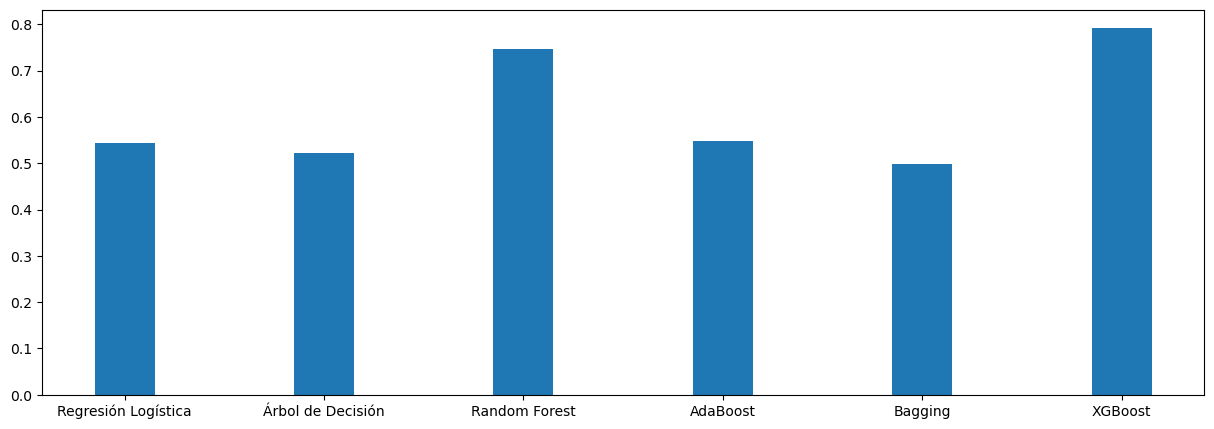

In [ ]:
# Accuracy
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_acc, width=0.3)

<BarContainer object of 6 artists>

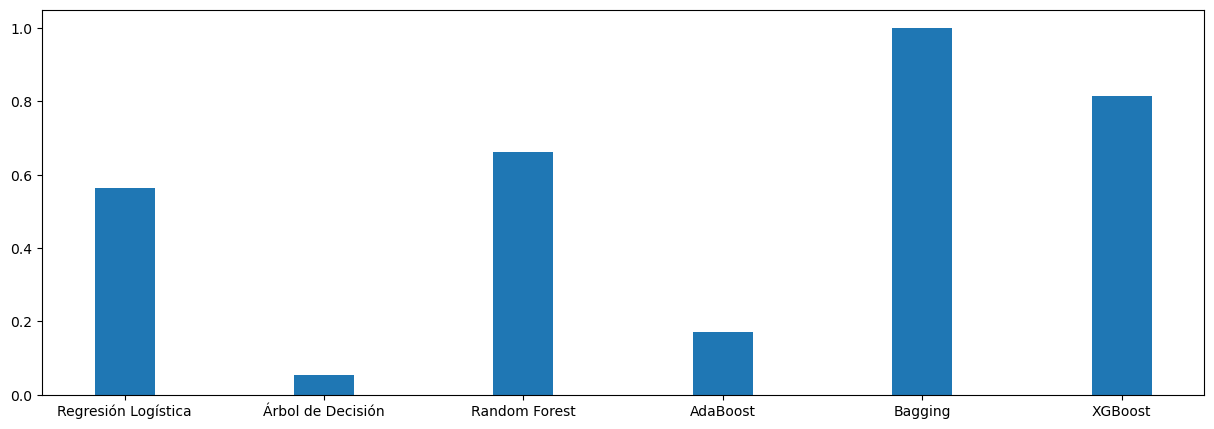

In [ ]:
# Recall/Sensitivity= 1-FNR
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_rec, width=0.3)

<BarContainer object of 6 artists>

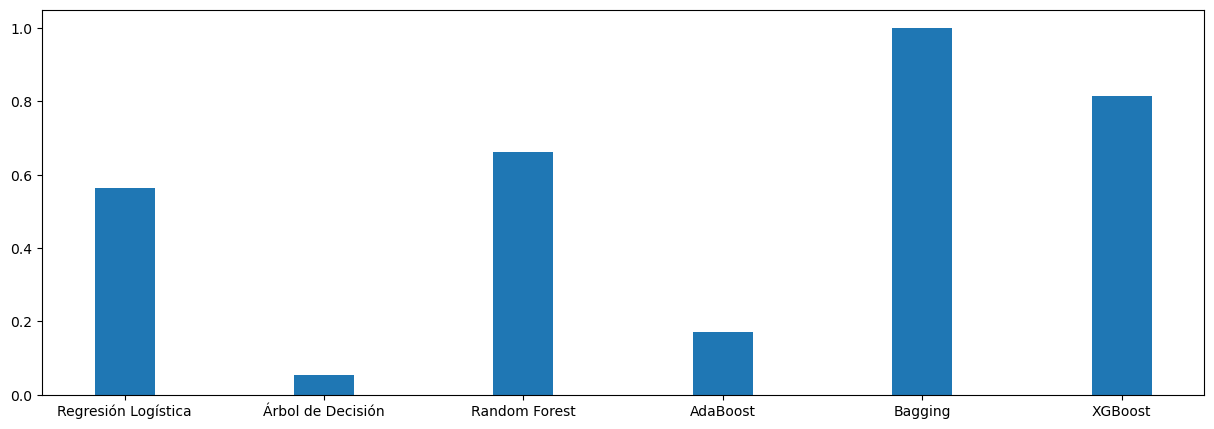

In [ ]:
# Precision = 1-FDR
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_rec, width=0.3)

<BarContainer object of 6 artists>

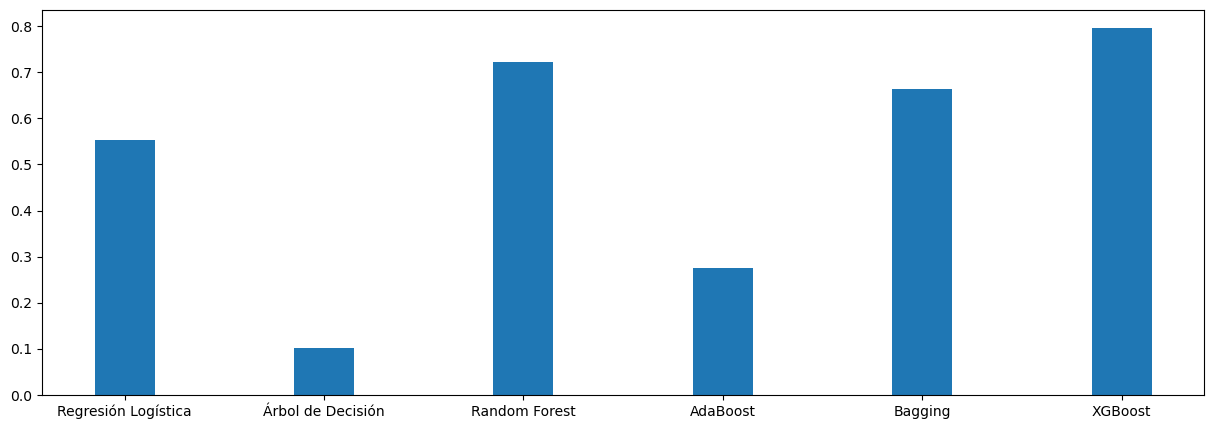

In [ ]:
# F1 = H. Mean Balance entre precision y recall/sensitividad 
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_f1, width=0.3)

## Parte 2

### Análisis de Resultados

Ahora usted utilizará la función `classication_report` para determinar qué clasificador se ajusta más a los resultados buscados, teniendo en cuenta el contexto del problema y la simplicidad de cada modelo.

### Random Forest

In [9]:
from sklearn.metrics import classification_report

y_pred_rf= rf_op.predict(X_test)
print(classification_report(y_test, y_pred_rf))

NameError: name 'rf_op' is not defined

### Árbol de Decisión

In [ ]:
y_pred_dt = dt_op.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.51      0.99      0.68       241
           1       0.81      0.05      0.10       239

    accuracy                           0.52       480
   macro avg       0.66      0.52      0.39       480
weighted avg       0.66      0.52      0.39       480



### XGBoost

In [ ]:
y_pred_xgb = xgb_op.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       241
           1       0.78      0.82      0.80       239

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



### Bagging de Árboles de Decisión

In [ ]:
y_pred_bagging = bagg_op.predict(X_test)
print(classification_report(y_test, y_pred_bagging))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       241
           1       0.50      1.00      0.66       239

    accuracy                           0.50       480
   macro avg       0.25      0.50      0.33       480
weighted avg       0.25      0.50      0.33       480



[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.7s finished
C:\Users\Diego\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Diego\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Diego\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

## Conclusiones

Concluya a partir de los resultados obtenidos y la documentación leída sobre los métodos utilizados y las diferencias entre sus distintos rendimientos.

